In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

Data extraction

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('Xtest.csv')

DataLook

In [3]:
train.head()

,Password,Times
0,631XniVx2lS5I,2
1,LEGIT747,1
2,742364es,1
3,3846696477,1
4,laurahop,2


In [4]:
any(train.Password.values == test.Password[0])

False

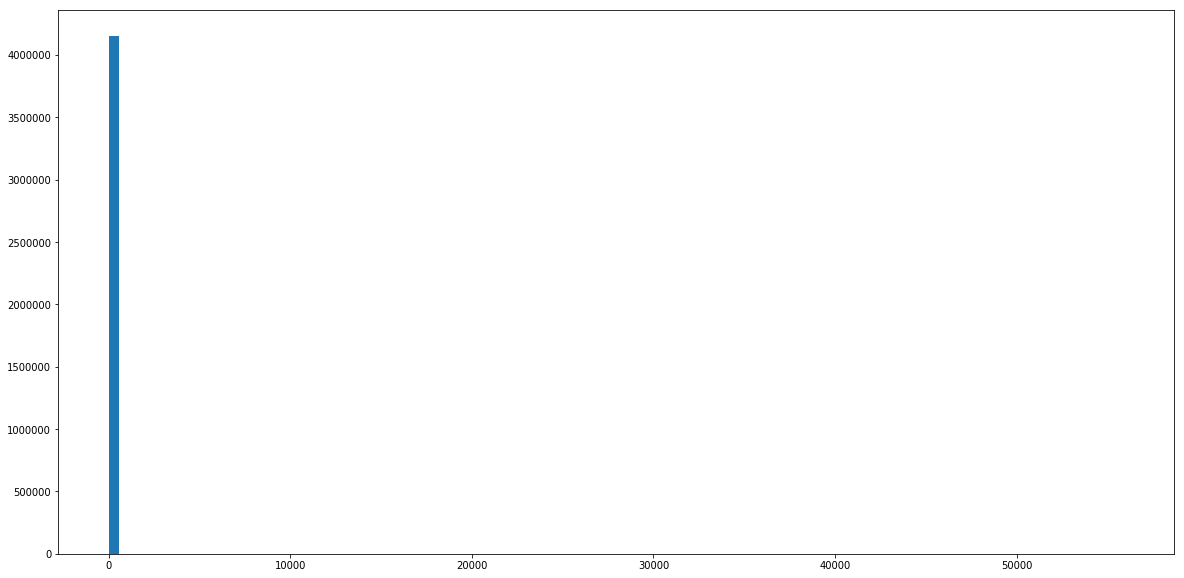

In [5]:
plt.figure(figsize=(20,10))
plt.hist(train.Times.values, bins = 100)
plt.show()

Functions for features creation

In [54]:
def features_create(word):
    features = [[],[],[],[]]
    features[0] = len(word)
    up = 0
    lo = 0
    nu = 0
    for symb in word:
        if symb.isnumeric():
            nu += 1
        elif symb.isupper():
            up += 1
        else:
            lo += 1
    features[1] = up
    features[2] = lo
    features[3] = nu
    return features

def all_fetures(words):
    features = []
    for word in words:
        features.append(features_create(word))
    return features

Features creation

In [72]:
X = all_fetures(train.fillna('0').Password.values)
y = np.log(train.fillna('0').Times.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

Model  creation and fitting

In [85]:
model = LGBMRegressor(random_state=47)
model.fit(X_train, y_train, eval_set=[(np.array(X_test), np.array(y_test))], eval_metric='rmse')

[1]	valid_0's l2: 0.292691	valid_0's rmse: 0.54101
[2]	valid_0's l2: 0.28804	valid_0's rmse: 0.536694
[3]	valid_0's l2: 0.284263	valid_0's rmse: 0.533164
[4]	valid_0's l2: 0.281196	valid_0's rmse: 0.530279
[5]	valid_0's l2: 0.27871	valid_0's rmse: 0.52793
[6]	valid_0's l2: 0.276686	valid_0's rmse: 0.52601
[7]	valid_0's l2: 0.275047	valid_0's rmse: 0.524449
[8]	valid_0's l2: 0.273713	valid_0's rmse: 0.523176
[9]	valid_0's l2: 0.272626	valid_0's rmse: 0.522136
[10]	valid_0's l2: 0.271742	valid_0's rmse: 0.521289
[11]	valid_0's l2: 0.271023	valid_0's rmse: 0.520599
[12]	valid_0's l2: 0.270439	valid_0's rmse: 0.520037
[13]	valid_0's l2: 0.269955	valid_0's rmse: 0.519572
[14]	valid_0's l2: 0.269562	valid_0's rmse: 0.519194
[15]	valid_0's l2: 0.269241	valid_0's rmse: 0.518885
[16]	valid_0's l2: 0.268979	valid_0's rmse: 0.518632
[17]	valid_0's l2: 0.268763	valid_0's rmse: 0.518424
[18]	valid_0's l2: 0.268582	valid_0's rmse: 0.518249
[19]	valid_0's l2: 0.268432	valid_0's rmse: 0.518104
[20]	va

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=47, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Model control

In [67]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [86]:
rmsle(y_test, model.predict(X_test))

0.2826935825064142

Prediction

In [90]:
X_control = all_fetures(test.fillna('0').Password.values)
prediction = np.exp(model.predict(X_control))
pd.DataFrame(prediction, index=range(test.shape[0]), columns=['Times']).to_csv('lgbm_submit.csv', index_label='Id')